<a href="https://colab.research.google.com/github/ChihChienLI/ChihChienLI/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction

**About** **Dataset**

link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]



#Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

data=pd.read_csv("/content/drive/Shareddrives/Python group 5/heart.csv", na_values=["unknown\"\""])
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#Individual Data Analysis

In [ ]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
165,46,M,TA,140,272,1,Normal,175,N,2.0,Flat,1
79,49,M,ASY,130,206,0,Normal,170,N,0.0,Flat,1
542,54,F,ASY,138,274,0,Normal,105,Y,1.5,Flat,1
45,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat,0
619,74,F,ATA,120,269,0,LVH,121,Y,0.2,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##1.Age

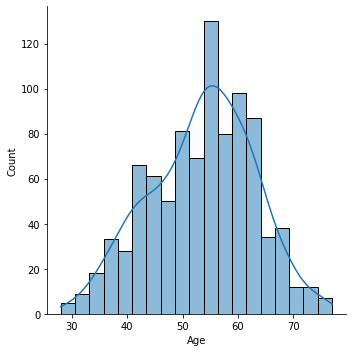

In [ ]:
sns.displot(data['Age'],kde=True)

<Axes: xlabel='HeartDisease', ylabel='Age'>

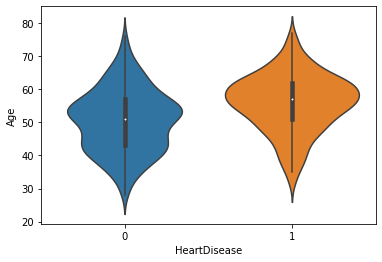

In [ ]:
sns.violinplot(y=data["Age"],x=data["HeartDisease"])

##2.Sex

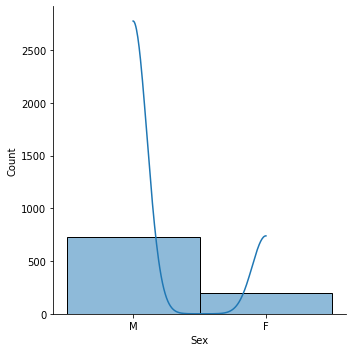

In [ ]:
sns.displot(data['Sex'],kde=True)

<Axes: ylabel='None'>

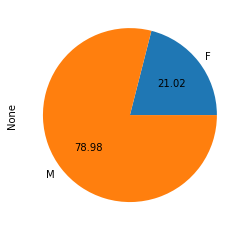

In [ ]:
data.groupby("Sex").size().plot(kind="pie",autopct= '%.2f')

## 3.Chest Pain Type

TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic

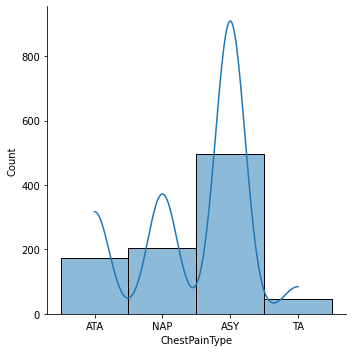

In [ ]:
sns.displot(data['ChestPainType'],kde=True)

<Axes: ylabel='None'>

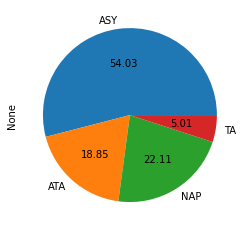

In [ ]:
data.groupby("ChestPainType").size().plot(kind="pie",autopct= '%.2f')

##4.Resting Blood Pressure

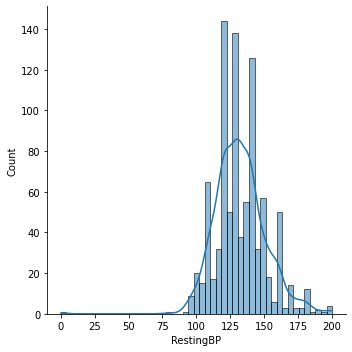

In [ ]:
sns.displot(data['RestingBP'],kde=True)

##5.Serum Cholesterol

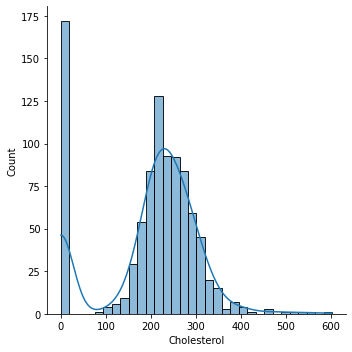

In [ ]:
sns.displot(data['Cholesterol'],kde=True)

##6.Fasting Blood Sugar

if FastingBS > 120 mg/dl, 0: otherwise

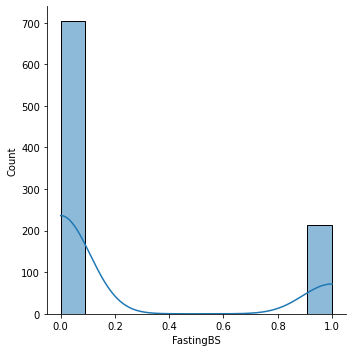

In [ ]:
sns.displot(data['FastingBS'],kde=True)

##7.Resting Electrocardiogram Results

Normal: Normal
 
ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

<Axes: ylabel='None'>

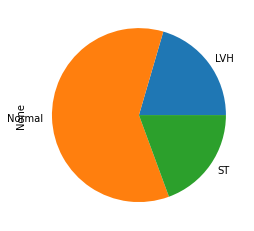

In [ ]:
data.groupby('RestingECG').size().plot(kind="pie")

##8.Maximum Heart Rate Achieved 

Numeric value between 60 and 202

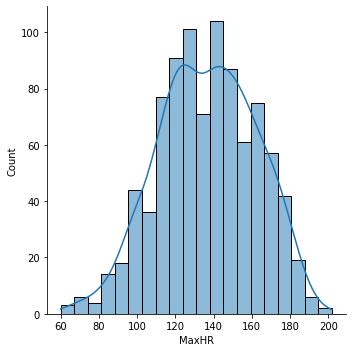

In [ ]:
sns.displot(data['MaxHR'],kde=True)

##9.Exercise-induced Angina 

Y: Yes, N: No

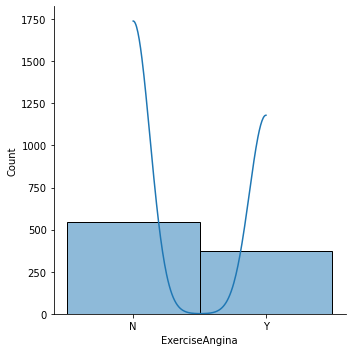

In [ ]:
sns.displot(data['ExerciseAngina'],kde=True)

##10.Old Peak

 oldpeak = ST 
 
 Numeric value measured in depression

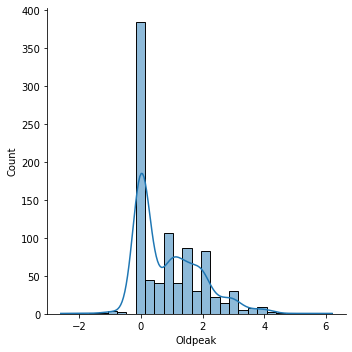

In [ ]:
sns.displot(data['Oldpeak'],kde=True)

##11.The Slope of The Peak Exercise ST Segment 

Up: upsloping, Flat: flat, Down: downsloping

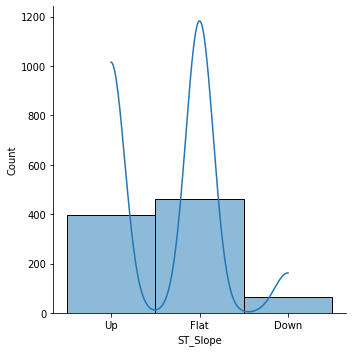

In [ ]:
sns.displot(data['ST_Slope'],kde=True)

#Heart Disease Analysis

##Pivoting Features

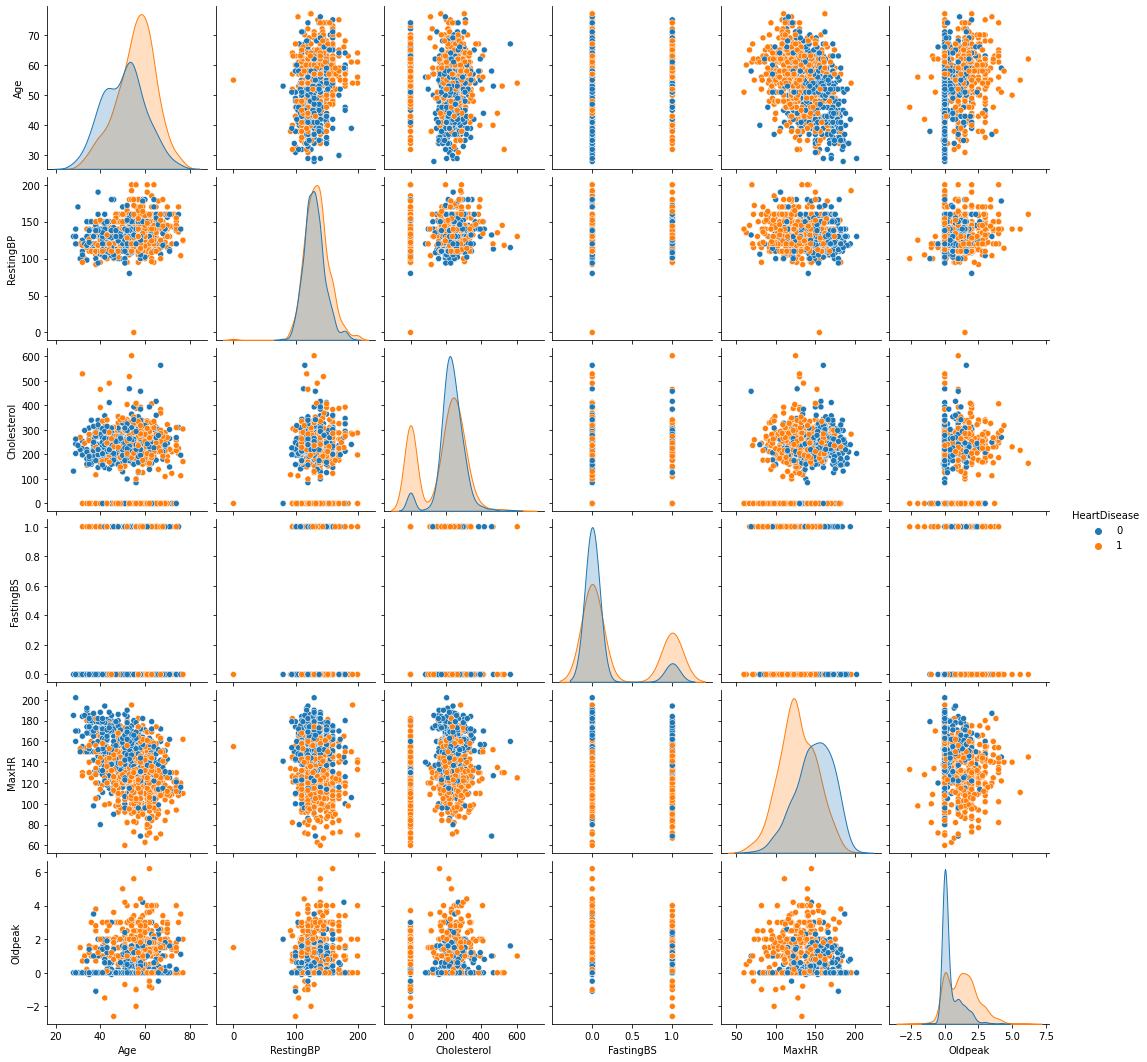

In [ ]:
a=sns.pairplot(data, hue='HeartDisease')

In [ ]:
target = ['HeartDisease']

num_attribs = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_nom_attribs = ['ChestPainType', 'RestingECG', 'ST_Slope']
cat_bin_attribs = ['Sex', 'FastingBS', 'ExerciseAngina']
cat_attribs = cat_nom_attribs + cat_bin_attribs

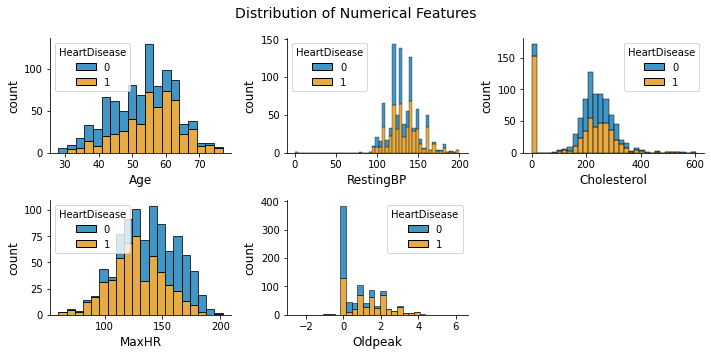

In [ ]:
ncol = 3
nrow = int(np.ceil(len(num_attribs)/ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(10, 5), facecolor=None)   

i = 1
for col in num_attribs:
    plt.subplot(nrow, ncol, i)
    ax = sns.histplot(data=data, x=col, hue=target[0], multiple="stack", palette='colorblind')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("count", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    i+=1

fig.delaxes(axs[nrow-1, ncol-1])
plt.suptitle('Distribution of Numerical Features', fontsize = 14);
plt.tight_layout()    

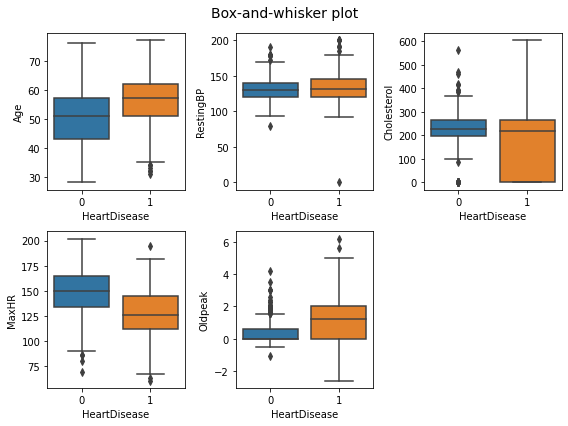

In [ ]:
ncol = 3
nrow = int(np.ceil(len(num_attribs)/ncol))

f, axes = plt.subplots(nrow, ncol, figsize=(8,6))

for name, ax in zip(num_attribs, axes.flatten()):
    sns.boxplot(y=name, x= "HeartDisease", data=data, orient='v', ax=ax)

f.delaxes(axes[nrow-1, ncol-1])
plt.suptitle('Box-and-whisker plot', fontsize = 14);
plt.tight_layout()    

**Summary of Descriptive Analysis**

**1.Categorical features**
- 7 categorical features, including the target feature - 3 nominal: ChestPainType, RestingECG, ST_Slope
- 4 binary features: Sex, FastingBS, ExerciseAngina, HeartDisease (target)
- **HeartDisease** (target variable): 55% of the sample have heart disease. Therefore, feature values that occur in smaller subsamples can be ruled out as main diagnostics of the disease. 
- **Sex:** Male comprise 79% of the sample. Number of females is 193, relatively low.
- **ChestPainType** has 4 values, among which **ASY** (asymptomatic) occurs most frequently (54%), followed by similar values (22 and 19%) for NAP and ATA. TA occurs only in 5%
- **FastingBS** has values of 1 (elavated blood sugar) in 23% of the sample
- **RestingECG**: 60% of the sample has normal ECG, the rest is equally divided between ST and LVH types 
- **ExerciseAngina**: 40% of the sample have exercise-induced angina (**Y**) and 60% do not. 
- **ST_Slope**: 50% of the sample has **Flat** slope of the peak exercise ST segment and 47% - upslopping (**Up**) 


**2. Numerical features**
 - 5 numerical interval features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak
 - Most of the sample is in the middle age. The mean **age** is 53.25% are younger than 47 and 25% are older than 60. 
 - **OldPeak** minimum value of -2.6 is far from the mean of 0.88. 
 - **MaxHR** shows large spread of values. This could be related to the known age-MaxHR dependence, but could also be an indicator of the heart disease.
 - There is no NAN values in the dataset. **Cholesterol** feature has 172 zero values and and **RestingBP** features has one zero value. Since this is not medically possible, we conclude that these are missing values.

##Associations between Categorial Features

In [ ]:
for attr in cat_attribs:
    display(data[[attr, 'HeartDisease']].groupby(attr, as_index=False).mean().sort_values(by='HeartDisease', ascending=False))

,ChestPainType,HeartDisease
0,ASY,0.790323
3,TA,0.434783
2,NAP,0.354680
1,ATA,0.138728


,RestingECG,HeartDisease
2,ST,0.657303
0,LVH,0.563830
1,Normal,0.516304


,ST_Slope,HeartDisease
1,Flat,0.828261
0,Down,0.777778
2,Up,0.197468


,Sex,HeartDisease
1,M,0.631724
0,F,0.259067


,FastingBS,HeartDisease
1,1,0.794393
0,0,0.480114


,ExerciseAngina,HeartDisease
1,Y,0.851752
0,N,0.351005


**Conclusions from pivoting feature analysis** 

We find that **ChestPainType**, **ExerciseAngina**, **ST_Slope**, and **Sex** features are more important for diagnosis.
 - **Sex** feature shows correlation with the heart disease. Males have a higher fraction of heart disease than females (63% vs 26%). Although the sample of female is relatively small.
 - **ChestPainType**: 79% of those who show Asymptomatic ChestPainType have heart disease. Less than a half, 43% and 35%, respectively, TA and NAP chest pain types also have heart disease.
 - **ExerciseAngina**: 85% of those who exercise angina have heart disease, in contrast to 35% who don't exercise angina
 - **ST_Slope**: 82% of flat ST Slope also have heart disease, in contrast to 20% who have upward slope.
 - **FastingBS**: There is a correlation between FastingBS=1 and heart disease (79% of the sample with elavated fasting blood sugar have heart disease). A bit less than a half of the sample without elevated also have heart disease. **Given that only 23% of the sample have FastingBS=1**, we do not expect this variable to be an important diagnostic.
 - **RestingECG**:The feature does not show strong correlation as other features.

**Correlating categorical features with target variable**

We plot the fractions of heart disease cases for different combinations of symptoms: **ChestPainType, ST_Slope and ExerciseAngina**.

We can now answer that: **Sample of women with the same symptoms has a smaller fraction of heart disease compared to men**, but the correlations between variables (slopes of lines below) are similar to those of men. We therefore decide to use the data for both genders.

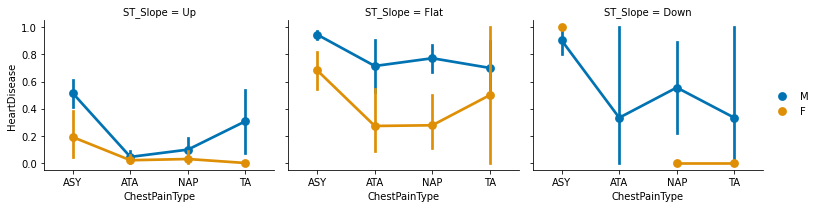

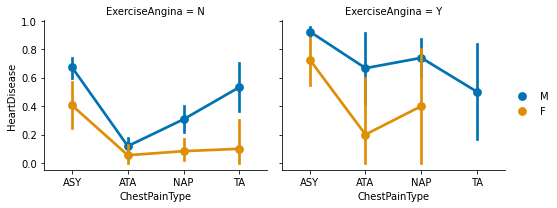

In [ ]:
grid = sns.FacetGrid(data, col='ST_Slope', height=3., aspect=1.2)
grid.map(sns.pointplot, 'ChestPainType' , 'HeartDisease', 'Sex', 
         hue_order=['M', 'F'], order=['ASY', 'ATA', 'NAP', 'TA'], palette='colorblind')
grid.add_legend()

grid = sns.FacetGrid(data, col='ExerciseAngina', height=3., aspect=1.2)
grid.map(sns.pointplot, 'ChestPainType' , 'HeartDisease', 'Sex', 
         hue_order=['M', 'F'], order=['ASY', 'ATA', 'NAP', 'TA'], palette='colorblind')
grid.add_legend()

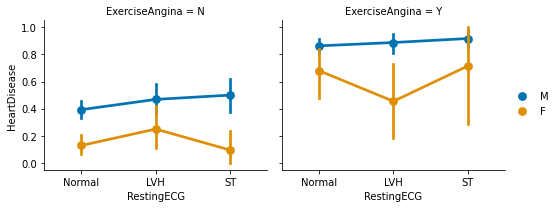

In [ ]:
grid = sns.FacetGrid(data, col='ExerciseAngina', height=3., aspect=1.2)
grid.map(sns.pointplot, 'RestingECG' , 'HeartDisease', 'Sex', 
         hue_order=['M', 'F'], order=['Normal', 'LVH', 'ST'], palette='colorblind')
grid.add_legend()

We perform an additional test of our assumption that data for both sexes can be used for diagnostic together. 

We calculate means for numerical features **MaxHR** and **OldPeak** for the sample of men and women with and without heart condition and find that the differences between these values of about 10%.

In [ ]:
print('MaxHR values for F, M:')
print('HeartDisease=0', round(data.loc[ (data["Sex"]=="F") & (data["HeartDisease"]==0) ]['MaxHR'].mean(),2), 
      round(data.loc[ (data["Sex"]=="M") & (data["HeartDisease"]==0) ]['MaxHR'].mean(),2))
print('HeartDisease=1', round(data.loc[ (data["Sex"]=="F") & (data["HeartDisease"]==1) ]['MaxHR'].mean(),2),
      round(data.loc[ (data["Sex"]=="M") & (data["HeartDisease"]==1) ]['MaxHR'].mean(),2))

print('Oldpeak values for F, M:')
print('HeartDisease=0', round(data.loc[ (data["Sex"]=="F") & (data["HeartDisease"]==0) ]['Oldpeak'].mean(),2),
      round(data.loc[ (data["Sex"]=="M") & (data["HeartDisease"]==0) ]['Oldpeak'].mean(),2))
print('HeartDisease=1', round(data.loc[ (data["Sex"]=="F") & (data["HeartDisease"]==1) ]['Oldpeak'].mean(),2), 
      round(data.loc[ (data["Sex"]=="M") & (data["HeartDisease"]==1) ]['Oldpeak'].mean(),2))

MaxHR values for F, M:
HeartDisease=0 149.05 147.67
HeartDisease=1 137.82 126.55
Oldpeak values for F, M:
HeartDisease=0 0.44 0.39
HeartDisease=1 1.34 1.27


Note:**Associations between categorical variables**

In statistics, Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive).

##Correlations between Numerical Features

Text(0.5, 1.0, "Association between categorical variables (Cramer's V)")

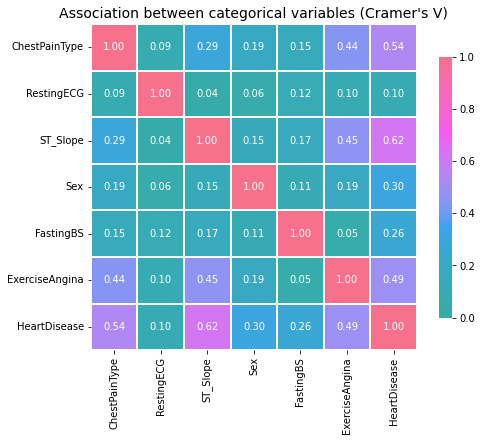

In [ ]:
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients
data_ = data[cat_attribs+target]
rows= []
for x in data_:
    col = []
    for y in data_ :
        col.append(cramers_v(data_[x], data_[y]) )
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# heatmap plot
mask = np.triu(np.ones_like(df, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 6), facecolor=None)
sns.heatmap(df, cmap=sns.color_palette("husl", as_cmap=True), 
            vmin=0, vmax=1.0, center=0, annot=True, fmt='.2f', 
            square=True, linewidths=.01, cbar_kws={"shrink": 0.8})
ax.set_title("Association between categorical variables (Cramer's V)", fontsize=14)

**Conclusions from association analysis between categorical features**

 - We confirm our findings from pivoting features that **ChestPainType**, **ExerciseAngina**, **ST_Slope** features are more important heart diagnostics. Among them, **ST_Slope** has the strongest association with heart condition (Cramér's V=0.69), followed by **ChestPainType** (V=0.54) and **ExerciseAngina** (V=0.49).
 - In contrast, **Sex** feature has the lowest association with heart condition (V=0.3) among these four attributes.
 - We now can answer on how important categorical features relate to each other. **ExerciseAngina** has the strongest associations with **ST_Slope** and **ChestPainType** (V=0.45). The coefficient for the **ST_Slope** and **ChestPainType** pair implies a lower association (V=0.29).

Note1: **Pearson's correlation matrix for numerical features**

- The Pearson correlation coefficient measures the linear relationship between two datasets. 
- Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
- Correlations of -1 or +1 imply an exact linear relationship. 
- Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases

Note2: **Correlation between numerical and target variable**

- The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y.
- Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.
- This function may be computed using a shortcut formula but produces the same result as pearsonr.

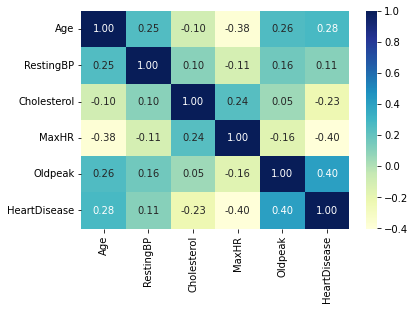

In [ ]:
corr_matrix = data[num_attribs+target].corr()

# plotting correlation heatmap
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

**Conclusions from correlations of numerical features**
 - There are no strong correlations, which we keep all attributes
 - A moderate anticorrelation with coefficient of -0.38 is found between **MaxHR** and **Age**. It agrees with a well known relationship between maximum heart rate and age.
 - When we compare correlations with the target variable, we find the strongest relationship for **MaxHR** and **OldPeak** features. Their coefficients of 0.4 and -0.4 imply moderate relationships.
 - Coefficient for **RestingBP** feature of 0.11 implies almost no correlation. We can consider removing this feature from the machine learning.

#Summary of correlation analysis

**1.Pivoting features**
 - **Sex** is an important factor, since males have a significantly higher fraction of heart disease than females (63% vs 26%) in our sample. Correlations between other categorical feature values and the target for female sample are similar to those of males.
 - **ChestPainType**: 79% of those who show Asymptomatic ChestPainType have heart disease. Less than a half, 43% and 35%, respectively, TA and NAP chest pain types also have heart disease.
 - **ExerciseAngina**: 85% of those who exercise angina have heart disease, in contrast to 35% who don't exercise angina 
 - **ST_Slope**: 82% of flat ST Slope also have heart disease, in contrast to 20% who have upward slope 
 
**2.Associations between categorical features**
 - We find no strong correlations with the target variable for both categorical and numeric features. It is expected, since otherwise it would be much easier to diagnose heart disease.
 - **ST_Slope** feature has the higest association with **HeartDisease**, followed by **ChestPainType**, **ExerciseAngina**, and **Sex**. The latter has the lowest association with the target variable among these four attributes.
 - **ST_Slope** has the strongest association with **ExerciseAngina** feature. **ExerciseAngina** has similarly strong correlation with **ChestPainType**. **ST_Slope** and **ChestPainType** pair shows lower correlation. 
 
**3.Correlations between numerical features**
 - There are also no strong correlations between numerical features, with the highest correlation coefficient of -0.38 found for MaxHR and Age).
 - When we compare correlations with the target variable, we find the strongest, albight moderate correlation for **OldPeak** feature and moderate anticorrelation for *MaxHR*. Based on EDA, we expect categorical features **ST_Slope**, **ChestPainType**, **ExerciseAngina**, and **Sex** and numerical features **MaxHR** and **OldPeak** to be important for prediction of heart disease in the following machine learning analysis.

# Checking for NULLs in the data

In [ ]:
# Checking for NULLs in the data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Get dummies
string_col = data.select_dtypes(include="object").columns

df=pd.get_dummies(data,columns=string_col,drop_first=False)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# DEFINE VALUES
y = df.HeartDisease.values
x_data = df.drop(['HeartDisease'],axis=1)
x_data.shape

(918, 20)

In [ ]:
# DATA NORMALIZATION
# Formula = (x - min(x)) / (max(x) - min(x))

x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x.shape

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


(918, 20)

#Training Data and Testing Data

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((734, 20), (184, 20), (734,), (184,))

# Model 1: LOGISTIC REGRESSION

In logistic regression, the output variable is binary, meaning it can take on only two values, typically 0 and 1, where 0 represents the negative class and 1 represents the positive class. The input features can be continuous, categorical, or a combination of both. Logistic regression is widely used in various domains, such as healthcare, finance, marketing, and social sciences, for tasks such as fraud detection, spam filtering, churn prediction, and customer segmentation.

Recall measures the ability of a model to identify all positive cases correctly. In our case, recall rates can show how precise our models are. In addition, in medical case, High recall indicates that the model is good at identifying positive cases, which is crucial for making accurate predictions.


In [ ]:
# Model 1: LOGISTIC REGRESSION

# Sklearn library
from sklearn.linear_model import LogisticRegression

# Model
lr = LogisticRegression()

# Train
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [ ]:
# Accuracy
print("Accuracy of Logistic Regression: {}\n".format(lr.score(x_test,y_test)))

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of loigistic regression:\n {}".format(cm))

# Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification report of logistic regression:\n {}".format(cr))

Accuracy of Logistic Regression: 0.8641304347826086

Confusion matrix of loigistic regression:
 [[73 14]
 [11 86]]
Classification report of logistic regression:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        87
           1       0.86      0.89      0.87        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



The output shows that the Logistic Regression classifier predicted 73 true negatives (TN), 86 true positives (TP), 14 false positives (FP), and 11 false negatives (FN) on the test set, with a total of 184(20% of the data).

Class 0 refers to the samples that do not have heart failure, while class 1 refers to the samples that have heart failure.

Recall is a performance metric that measures the proportion of actual positive cases (class 1) that are correctly identified as positive by the model.

The recall for class 1 is 0.89.

# Model 2: K-NEAREST NEIGHBORS(KNN)

In [ ]:
# Model 2: K-NEAREST NEIGHBORS(KNN)
# Sklearn libarary
from sklearn.neighbors import KNeighborsClassifier

# Model
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [ ]:
# Accuracy
print("Accuracy of KNN: {}\n".format(knn.score(x_test,y_test)))

# Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification report of logistic regression:\n {}".format(cr))

#Confusion Metrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of KNN:\n {}".format(cm))

Accuracy of KNN: 0.8913043478260869

Classification report of logistic regression:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        87
           1       0.89      0.91      0.90        97

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

Confusion matrix of KNN:
 [[76 11]
 [ 9 88]]


KNN Classifier works by finding the K nearest neighbors of a new data point in the training data and assigning it to the class that is most common among the K neighbors. The distance between data points is calculated using a distance metric

The output shows that the K Neighbors Classifier predicted 76 true negatives (TN), 88 true positives (TP), 11 false positives (FP), and 9 false negatives (FN) on the test set.

The recall for class 1 is 0.91.

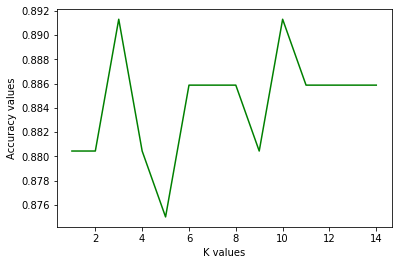

Best K values is: 3 and highest accuracy is: 0.8913043478260869 


In [ ]:
# Finding Best K Values

# Lists for values
trian_accuracy = []
test_accuracy = []

for each in range(1,15):
    
    # Test KNN Algorithm
    knn_2 = KNeighborsClassifier(n_neighbors=each)
    
    trian_accuracy.append(knn_2.fit(x_train,y_train))
    test_accuracy.append(knn_2.score(x_test,y_test))
    
# Plot
plt.plot(range(1,15),test_accuracy,color='green')
plt.xlabel('K values')
plt.ylabel('Accuracy values')
plt.show()

print("Best K values is: {} and highest accuracy is: {} ".format( 1 + test_accuracy.index(np.max(test_accuracy)), np.max(test_accuracy)))

# Model 3: SUPPORT VECTOR MACHINE(SVM)

In [ ]:
# Model 3: SUPPORT VECTOR MACHINE(SVM)
# Sklearn library
from sklearn.svm import SVC

# Model
svm = SVC(kernel = 'rbf',)

# Train
svm.fit(x_train,y_train)

y_pred = svm.predict(x_test)

In [ ]:
# Accuracy
print("Accoracy of SVM: {}\n".format(svm.score(x_test,y_test)))

# Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification report of logistic regression:\n {}".format(cr))

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of SVM:\n {}".format(cm))

Accoracy of SVM: 0.8641304347826086

Classification report of logistic regression:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        87
           1       0.86      0.89      0.87        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion matrix of SVM:
 [[73 14]
 [11 86]]


SVM (Support Vector Machines) is a supervised machine learning algorithm used for classification and regression tasks. SVM is a binary classifier that tries to find the best possible boundary that separates the different classes of data.

The output shows that the Logistic Regression classifier predicted 73 true negatives (TN), 86 true positives (TP), 14 false positives (FP), and 11 false negatives (FN) on the test set, with a total of 184(20% of the data).

The recall for class 1 is 0.89.

# Model 4: NAIVE BAYES

In [ ]:
# Model 4: NAIVE BAYES

# Sklearn library
from sklearn.naive_bayes import GaussianNB

# Model
nb = GaussianNB()

# Train
nb.fit(x_train,y_train)

y_pred = nb.predict(x_test)

In [ ]:
# Accuracy
print("Accuracy of Naive Bayes: {}\n".format(nb.score(x_test,y_test)))

# Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification report of logistic regression:\n {}".format(cr))

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of Naive Bayes:\n {}".format(cm))

Accuracy of Naive Bayes: 0.8586956521739131

Classification report of logistic regression:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        87
           1       0.89      0.84      0.86        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Confusion matrix of Naive Bayes:
 [[77 10]
 [16 81]]


Naive Bayes is a machine learning algorithm used for classification tasks. It is a probabilistic algorithm that uses Bayes' theorem to calculate the probability of a data point belonging to a particular class given its input features.

The output shows that the Naive Bayes classifier predicted 77 true negatives (TN), 81 true positives (TP), 10 false positives (FP), and 16 false negatives (FN) on the test set.

The recall for class 1 is 0.84.

Based on the accuracy, K Neighbors Classifier has the best accuracy(0.89) among the 4 models.

1.   Logistic: 86%
2.   K-Nearest Neighbors: 89%
3.   Support Vector Machine: 86%
4.   Naive Bayes: 85%

We want to get the best recall in order to detect all patients who has a heart disease.

Based on the recall, K Neighbors Classifier has the best accuracy(0.91) among the 4 models.


1.   Logistic: 89%
2.   K-Nearest Neighbors: 91%
3.   Support Vector Machine: 89%
4.   Naive Bayes: 84%


# Model 5: AutoML

In [ ]:
# Model 5: Using AutoML to the best model wiht the highest accuracy

#Install FlAML
!pip install flaml
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()

# Specify automl goal and constraint.
# The training will only last 90 seconds.
# The 'metric' parameter sets the evaluation metric to be used to evaluate the performance of the model,which is set to 'accuracy' in this case.
# The 'task' parameter specifies the type of machine learning task, which is set to 'classification' in this case.

automl_settings = {
    "time_budget": 90,  
    "metric": 'accuracy',
    "task": 'classification',
}

# Train
automl.fit(X_train=x_train, y_train=y_train, **automl_settings)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 KB 4.2 MB/s eta 0:00:00
[flaml.automl.automl: 03-18 19:29:19] {2726} INFO - task = classification
[flaml.automl.automl: 03-18 19:29:19] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 03-18 19:29:19] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-18 19:29:19] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 03-18 19:29:19] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 03-18 19:29:19] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-18 19:29:19] {3472} INFO - Estimated sufficient time budget=955s. Estimated necessary time budget=22s.
[flaml.automl.automl: 03-18 19:29:19] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.1621,	best estimator lgbm's best error=0.16

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 0.7s,	estimator xgboost's best error=0.1785,	best estimator lgbm's best error=0.1431
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 8, current learner lgbm
[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 0.8s,	estimator lgbm's best error=0.1431,	best estimator lgbm's best error=0.1431
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 9, current learner lgbm
[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 0.9s,	estimator lgbm's best error=0.1431,	best estimator lgbm's best error=0.1431
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 10, current learner lgbm
[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 0.9s,	estimator lgbm's best error=0.1431,	best estimator lgbm's best error=0.1431
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 11, current learner lgbm
[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 1.0s,	estimator lgbm's best error=0.1417,	b

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 1.4s,	estimator extra_tree's best error=0.1608,	best estimator lgbm's best error=0.1417
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 15, current learner rf
[flaml.automl.automl: 03-18 19:29:20] {3519} INFO -  at 1.5s,	estimator rf's best error=0.2058,	best estimator lgbm's best error=0.1417
[flaml.automl.automl: 03-18 19:29:20] {3334} INFO - iteration 16, current learner lgbm
[flaml.automl.automl: 03-18 19:29:21] {3519} INFO -  at 1.6s,	estimator lgbm's best error=0.1417,	best estimator lgbm's best error=0.1417
[flaml.automl.automl: 03-18 19:29:21] {3334} INFO - iteration 17, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:21] {3519} INFO -  at 1.7s,	estimator extra_tree's best error=0.1608,	best estimator lgbm's best error=0.1417
[flaml.automl.automl: 03-18 19:29:21] {3334} INFO - iteration 18, current learner lgbm
[flaml.automl.automl: 03-18 19:29:21] {3519} INFO -  at 1.8s,	estimator lgbm's best er

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 2.6s,	estimator extra_tree's best error=0.1608,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 26, current learner lgbm
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 2.7s,	estimator lgbm's best error=0.1403,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 27, current learner rf
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 2.8s,	estimator rf's best error=0.1485,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 28, current learner xgboost
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.0s,	estimator xgboost's best error=0.1621,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.1s,	estimator xgboost's best error=0.1553,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 30, current learner lgbm
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.2s,	estimator lgbm's best error=0.1403,	best estimator lgbm's best error=0.1403
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 31, current learner lgbm
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.3s,	estimator lgbm's best error=0.1349,	best estimator lgbm's best error=0.1349
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 32, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.3s,	estimator lgbm's best error=0.1349,	best estimator lgbm's best error=0.1349
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 33, current learner xgboost
[flaml.automl.automl: 03-18 19:29:22] {3519} INFO -  at 3.5s,	estimator xgboost's best error=0.1526,	best estimator lgbm's best error=0.1349
[flaml.automl.automl: 03-18 19:29:22] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 3.5s,	estimator lgbm's best error=0.1335,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 35, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 3.6s,	estimator lgbm's best error=0.1335,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 36, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 3.7s,	estimator extra_tree's best error=0.1376,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 37, current learner lgbm
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 3.8s,	estimator lgbm's best error=0.1335,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 38, current learner xgboost
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 3.9s,	estimator xgboost's best error=0.1526,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 39, current learner lgbm
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 4.0s,	estimator lgbm's bes

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 4.1s,	estimator xgboost's best error=0.1526,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 41, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 4.3s,	estimator extra_tree's best error=0.1376,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 42, current learner lgbm
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 4.4s,	estimator lgbm's best error=0.1335,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 43, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:23] {3519} INFO -  at 4.5s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:23] {3334} INFO - iteration 44, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:24] {3519} INFO -  at 4.7s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1335
[flaml.automl.automl: 03-18 19:29:24] {3334} INFO - iteration 45, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:24] {3519} INFO -  at 4.8s,	es

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:30] {3519} INFO -  at 11.2s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:30] {3334} INFO - iteration 71, current learner xgboost
[flaml.automl.automl: 03-18 19:29:30] {3519} INFO -  at 11.3s,	estimator xgboost's best error=0.1512,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:30] {3334} INFO - iteration 72, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:30] {3519} INFO -  at 11.5s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:30] {3334} INFO - iteration 73, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:31] {3519} INFO -  at 11.6s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:31] {3334} INFO - iteration 74, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:31] {3519} INFO -  at 11.7s,	estimator extra_tree's best error=0.1349,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:31] {3334} INFO - iteration 75, current learner lgbm
[flaml.automl.automl: 03-18 19:29:31] {3519} INFO -  at 11.8s,	estimator lgbm's best error=0.1295,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:31] {3334} INFO - iteration 76, current learner lgbm
[flaml.automl.automl: 03-18 19:29:31] {3519} INFO -  at 11.9s,	est

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:32] {3519} INFO -  at 13.1s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:32] {3334} INFO - iteration 85, current learner rf
[flaml.automl.automl: 03-18 19:29:32] {3519} INFO -  at 13.2s,	estimator rf's best error=0.1444,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:32] {3334} INFO - iteration 86, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:32] {3519} INFO -  at 13.5s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:32] {3334} INFO - iteration 87, current learner lgbm
[flaml.automl.automl: 03-18 19:29:33] {3519} INFO -  at 13.5s,	estimator lgbm's best error=0.1295,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:33] {3334} INFO - iteration 88, current learner lgbm
[flaml.automl.automl: 03-18 19:29:33] {3519} INFO -  at 13.6s,	estimator lgbm's be

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:33] {3519} INFO -  at 14.4s,	estimator rf's best error=0.1417,	best estimator lgbm's best error=0.1295
[flaml.automl.automl: 03-18 19:29:33] {3334} INFO - iteration 94, current learner lgbm
[flaml.automl.automl: 03-18 19:29:34] {3519} INFO -  at 14.6s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:34] {3334} INFO - iteration 95, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:34] {3519} INFO -  at 14.8s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:34] {3334} INFO - iteration 96, current learner rf
[flaml.automl.automl: 03-18 19:29:34] {3519} INFO -  at 14.9s,	estimator rf's best error=0.1417,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:34] {3334} INFO - iteration 97, current learner rf
[flaml.automl.automl: 03-18 19:29:34] {3519} INFO -  at 15.5s,	estimator rf's best error=0.1

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:48] {3519} INFO -  at 29.4s,	estimator rf's best error=0.1349,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:48] {3334} INFO - iteration 130, current learner rf
[flaml.automl.automl: 03-18 19:29:49] {3519} INFO -  at 30.3s,	estimator rf's best error=0.1335,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:49] {3334} INFO - iteration 131, current learner xgboost
[flaml.automl.automl: 03-18 19:29:49] {3519} INFO -  at 30.4s,	estimator xgboost's best error=0.1485,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:49] {3334} INFO - iteration 132, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:50] {3519} INFO -  at 30.6s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:50] {3334} INFO - iteration 133, current learner lgbm
[flaml.automl.automl: 03-18 19:29:50] {3519} INFO -  at 30.9s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:50] {3334} INFO - iteration 134, current learner rf
[flaml.automl.automl: 03-18 19:29:51] {3519} INFO -  at 31.6s,	estimator rf's best error=0.1335,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:51] {3334} INFO - iteration 135, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:51] {3519} INFO -  at 31.8s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:51] {3334} INFO - iteration 136, current learner lgbm
[flaml.automl.automl: 03-18 19:29:51] {3519} INFO -  at 32.0s,	estimator lgbm's best

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:52] {3519} INFO -  at 32.7s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:52] {3334} INFO - iteration 140, current learner xgboost
[flaml.automl.automl: 03-18 19:29:52] {3519} INFO -  at 32.8s,	estimator xgboost's best error=0.1485,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:52] {3334} INFO - iteration 141, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:52] {3519} INFO -  at 33.4s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:52] {3334} INFO - iteration 142, current learner xgboost
[flaml.automl.automl: 03-18 19:29:53] {3519} INFO -  at 33.6s,	estimator xgboost's best error=0.1376,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:53] {3334} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:53] {3519} INFO -  at 33.7s,	estimator xgboost's best error=0.1376,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:53] {3334} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:53] {3519} INFO -  at 33.9s,	estimator xgboost's best error=0.1376,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:53] {3334} INFO - iteration 145, current learner lgbm
[flaml.automl.automl: 03-18 19:29:53] {3519} INFO -  at 34.0s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:53] {3334} INFO - iteration 146, current learner lgbm
[flaml.automl.automl: 03-18 19:29:53] {3519} INFO -  at 34.3s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:53] {3334} INFO - iteration 147, current learner lgbm
[flaml.automl.automl: 03-18 19:29:54] {3519} INFO -  at 34.5s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:54] {3334} INFO - iteration 148, current learner lgbm
[flaml.automl.automl: 03-18 19:29:54] {3519} INFO -  at 34.7s,	estimator lgbm's best erro

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:58] {3519} INFO -  at 39.5s,	estimator xgboost's best error=0.1376,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:59] {3334} INFO - iteration 152, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:29:59] {3519} INFO -  at 39.7s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:59] {3334} INFO - iteration 153, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:29:59] {3519} INFO -  at 40.1s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:59] {3334} INFO - iteration 154, current learner lgbm
[flaml.automl.automl: 03-18 19:29:59] {3519} INFO -  at 40.3s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:59] {3334} INFO - iteration 155, current learner extra_tree
[flaml.automl.automl: 03-18 19:29:59] {3519} INFO -  at 40.5s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:29:59] {3334} INFO - iteration 156, current learner xgboost
[flaml.automl.automl: 03-18 19:30:00] {3519} INFO -  at 40.6s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:00] {3334} INFO - iteration 157, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:00] {3519} INFO -  at 40.8s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:00] {3334} INFO - iteration 158, current learner lgbm
[flaml.automl.automl: 03-18 19:30:00] {3519} INFO -  at 41.3s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:00] {3334} INFO - iteration 159, current learner xgboost
[flaml.automl.automl: 03-18 19:30:00] {3519} INFO -  at 41.4s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:00] {3334} INFO - iteration 160, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:01] {3519} INFO -  at 41.8s,	estimator lgbm's best error=0.1281,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:01] {3334} INFO - iteration 161, current learner xgboost
[flaml.automl.automl: 03-18 19:30:01] {3519} INFO -  at 42.1s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1281


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:01] {3334} INFO - iteration 162, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:01] {3519} INFO -  at 42.2s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:01] {3334} INFO - iteration 163, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:01] {3519} INFO -  at 42.4s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:01] {3334} INFO - iteration 164, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:01] {3519} INFO -  at 42.5s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:01] {3334} INFO - iteration 165, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 42.7s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 166, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 42.8s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 167, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 42.9s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 168, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 43.1s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 169, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 43.2s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1281
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 170, current learner lgbm
[flaml.automl.automl: 03-18 19:30:02] {3519} INFO -  at 43.4s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:02] {3334} INFO - iteration 171, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:03] {3519} INFO -  at 43.8s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:03] {3334} INFO - iteration 172, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:03] {3519} INFO -  at 43.9s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:03] {3334} INFO - iteration 173, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:03] {3519} INFO -  at 44.1s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:03] {3334} INFO - iteration 174, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:03] {3519} INFO -  at 44.2s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:03] {3334} INFO - iteration 175, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:03] {3519} INFO -  at 44.4s,	estimator xgb_limitdepth's best error=0.1390,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:03] {3334} INFO - iteration 176, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 44.5s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 177, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 44.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 178, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 44.8s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 179, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 45.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 180, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 45.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 181, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 45.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 182, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:04] {3519} INFO -  at 45.4s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:04] {3334} INFO - iteration 183, current learner lgbm
[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 45.5s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 184, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 45.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 185, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 45.8s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 186, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 46.1s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 187, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 46.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 188, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 46.3s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 189, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:05] {3519} INFO -  at 46.5s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:05] {3334} INFO - iteration 190, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 46.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 46.8s,	estimator xgboost's best error=0.1349,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 192, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 46.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 193, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 47.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 194, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 47.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 195, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:06] {3519} INFO -  at 47.4s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:06] {3334} INFO - iteration 196, current learner lgbm
[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 47.6s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 197, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 47.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 198, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 47.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 199, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 48.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 200, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 48.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 201, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 48.3s,	estimator lgbm's best error=0.1240,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 202, current learner xgboost
[flaml.automl.automl: 03-18 19:30:07] {3519} INFO -  at 48.5s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:07] {3334} INFO - iteration 203, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:08] {3519} INFO -  at 48.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:08] {3334} INFO - iteration 204, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:08] {3519} INFO -  at 48.8s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:08] {3334} INFO - iteration 205, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:08] {3519} INFO -  at 48.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:08] {3334} INFO - iteration 206, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:08] {3519} INFO -  at 49.2s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:08] {3334} INFO - iteration 207, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:10] {3519} INFO -  at 51.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:10] {3334} INFO - iteration 208, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 53.6s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 209, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 53.8s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 210, current learner xgboost
[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 53.9s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 211, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 54.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 54.2s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 213, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:13] {3519} INFO -  at 54.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:13] {3334} INFO - iteration 214, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:14] {3519} INFO -  at 54.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:14] {3334} INFO - iteration 215, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:14] {3519} INFO -  at 54.8s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:14] {3334} INFO - iteration 216, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:14] {3519} INFO -  at 54.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1240
[flaml.automl.automl: 03-18 19:30:14] {3334} INFO - iteration 217, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:14] {3519} INFO -  at 55.1s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:14] {3334} INFO - iteration 218, current learner lgbm
[flaml.automl.automl: 03-18 19:30:14] {3519} INFO -  at 55.3s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:14] {3334} INFO - iteration 219, current learner lgbm
[flaml.automl.automl: 03-18 19:30:15] {3519} INFO -  at 55.6s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:15] {3334} INFO - iteration 220, current learner lgbm
[flaml.automl.automl: 03-18 19:30:15] {3519} INFO -  at 55.8s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:15] {3334} INFO - iteration 221, current learner lgbm
[flaml.automl.automl: 03-18 19:30:15] {3519} INFO -  at 56.1s,	estimator lgbm's best error=0

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:15] {3519} INFO -  at 56.4s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:15] {3334} INFO - iteration 224, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:16] {3519} INFO -  at 56.6s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:16] {3334} INFO - iteration 225, current learner lgbm
[flaml.automl.automl: 03-18 19:30:16] {3519} INFO -  at 56.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:16] {3334} INFO - iteration 226, current learner lgbm
[flaml.automl.automl: 03-18 19:30:16] {3519} INFO -  at 57.1s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:16] {3334} INFO - iteration 227, current learner lgbm
[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 57.5s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:17] {3334} INFO - iteration 228, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 57.7s,	estimator xgb_limit

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 58.0s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:17] {3334} INFO - iteration 230, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 58.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:17] {3334} INFO - iteration 231, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 58.3s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:17] {3334} INFO - iteration 232, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:17] {3519} INFO -  at 58.5s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:17] {3334} INFO - iteration 233, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:18] {3519} INFO -  at 58.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:18] {3334} INFO - iteration 234, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:18] {3519} INFO -  at 58.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:18] {3334} INFO - iteration 235, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:18] {3519} INFO -  at 59.0s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:18] {3334} INFO - iteration 236, current learner lgbm
[flaml.automl.automl: 03-18 19:30:18] {3519} INFO -  at 59.3s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:18] {3334} INFO - iteration 237, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:18] {3519} INFO -  at 59.4s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:18] {3334} INFO - iteration 238, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:19] {3519} INFO -  at 59.7s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:19] {3334} INFO - iteration 239, current learner lgbm
[flaml.automl.automl: 03-18 19:30:19] {3519} INFO -  at 59.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:19] {3334} INFO - iteration 240, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:19] {3519} INFO -  at 60.2s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:19] {3334} INFO - iteration 241, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:20] {3519} INFO -  at 60.6s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:20] {3334} INFO - iteration 242, current learner xgboost
[flaml.automl.automl: 03-18 19:30:20] {3519} INFO -  at 60.8s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:20] {3334} INFO - iteration 243, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:20] {3519} INFO -  at 60.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:20] {3334} INFO - iteration 244, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:20] {3519} INFO -  at 61.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:20] {3334} INFO - iteration 245, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 61.5s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 246, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 61.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 247, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 61.9s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 248, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 62.0s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 249, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 62.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 250, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:21] {3519} INFO -  at 62.3s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:21] {3334} INFO - iteration 251, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:22] {3519} INFO -  at 62.6s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:22] {3334} INFO - iteration 252, current learner lgbm
[flaml.automl.automl: 03-18 19:30:22] {3519} INFO -  at 62.8s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:22] {3334} INFO - iteration 253, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:22] {3519} INFO -  at 62.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:22] {3334} INFO - iteration 254, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:22] {3519} INFO -  at 63.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:22] {3334} INFO - iteration 255, current learner lgbm
[flaml.automl.automl: 03-18 19:30:22] {3519} INFO -  at 63.3s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:22] {3334} INFO - iteration 256, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:23] {3519} INFO -  at 63.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:23] {3334} INFO - iteration 257, current learner lgbm
[flaml.automl.automl: 03-18 19:30:27] {3519} INFO -  at 67.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:27] {3334} INFO - iteration 258, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:27] {3519} INFO -  at 68.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:27] {3334} INFO - iteration 259, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:27] {3519} INFO -  at 68.2s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:27] {3334} INFO - iteration 260, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:27] {3519} INFO -  at 68.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:27] {3334} INFO - iteration 261, current learner extra_tree


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 68.6s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 262, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 68.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 263, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 68.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 264, current learner extra_tree
[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 69.1s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 265, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 69.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 266, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:28] {3519} INFO -  at 69.4s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:28] {3334} INFO - iteration 267, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:29] {3519} INFO -  at 69.5s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:29] {3334} INFO - iteration 268, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:29] {3519} INFO -  at 69.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:29] {3334} INFO - iteration 269, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:29] {3519} INFO -  at 69.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:29] {3334} INFO - iteration 270, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:30] {3519} INFO -  at 71.0s,	estimator rf's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:30] {3334} INFO - iteration 271, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:30] {3519} INFO -  at 71.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:30] {3334} INFO - iteration 272, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:30] {3519} INFO -  at 71.3s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:30] {3334} INFO - iteration 273, current learner xgboost
[flaml.automl.automl: 03-18 19:30:30] {3519} INFO -  at 71.5s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:30] {3334} INFO - iteration 274, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:31] {3519} INFO -  at 71.6s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:31] {3334} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:31] {3519} INFO -  at 71.9s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:31] {3334} INFO - iteration 276, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:31] {3519} INFO -  at 72.2s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:31] {3334} INFO - iteration 277, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:31] {3519} INFO -  at 72.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:31] {3334} INFO - iteration 278, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:31] {3519} INFO -  at 72.5s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:31] {3334} INFO - iteration 279, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:32] {3519} INFO -  at 72.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:32] {3334} INFO - iteration 280, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:32] {3519} INFO -  at 72.8s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:32] {3334} INFO - iteration 281, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:32] {3519} INFO -  at 73.4s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:32] {3334} INFO - iteration 282, current learner xgboost
[flaml.automl.automl: 03-18 19:30:33] {3519} INFO -  at 73.6s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:33] {3334} INFO - iteration 283, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:33] {3519} INFO -  at 74.2s,	estimator rf's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:33] {3334} INFO - iteration 284, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:33] {3519} INFO -  at 74.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:33] {3334} INFO - iteration 285, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:33] {3519} INFO -  at 74.5s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:33] {3334} INFO - iteration 286, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 74.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:34] {3334} INFO - iteration 287, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 74.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:34] {3334} INFO - iteration 288, current learner lgbm
[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 74.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:34] {3334} INFO - iteration 289, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 75.1s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:34] {3334} INFO - iteration 290, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 75.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:34] {3334} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:34] {3519} INFO -  at 75.5s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 292, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 75.7s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 75.8s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 294, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 76.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 295, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 76.1s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 296, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 76.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 297, current learner xgboost
[flaml.automl.automl: 03-18 19:30:35] {3519} INFO -  at 76.5s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:35] {3334} INFO - iteration 298, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:36] {3519} INFO -  at 76.7s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:36] {3334} INFO - iteration 299, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:36] {3519} INFO -  at 77.5s,	estimator rf's best error=0.1321,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:36] {3334} INFO - iteration 300, current learner lgbm
[flaml.automl.automl: 03-18 19:30:41] {3519} INFO -  at 81.6s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:41] {3334} INFO - iteration 301, current learner xgboost
[flaml.automl.automl: 03-18 19:30:41] {3519} INFO -  at 81.7s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:41] {3334} INFO - iteration 302, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:41] {3519} INFO -  at 81.9s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:41] {3334} INFO - iteration 303, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:41] {3519} INFO -  at 82.1s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:41] {3334} INFO - iteration 304, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:41] {3519} INFO -  at 82.5s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:41] {3334} INFO - iteration 305, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:42] {3519} INFO -  at 82.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:42] {3334} INFO - iteration 306, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:42] {3519} INFO -  at 82.8s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:42] {3334} INFO - iteration 307, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:42] {3519} INFO -  at 82.9s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:42] {3334} INFO - iteration 308, current learner xgboost
[flaml.automl.automl: 03-18 19:30:42] {3519} INFO -  at 83.1s,	estimator xgboost's best error=0.1294,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:42] {3334} INFO - iteration 309, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:43] {3519} INFO -  at 83.7s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:43] {3334} INFO - iteration 310, current learner xgboost
[flaml.automl.automl: 03-18 19:30:43] {3519} INFO -  at 83.8s,	estimator xgboost's best error=0.1281,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:43] {3334} INFO - iteration 311, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:44] {3519} INFO -  at 84.7s,	estimator rf's best error=0.1321,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:44] {3334} INFO - iteration 312, current learner lgbm
[flaml.automl.automl: 03-18 19:30:44] {3519} INFO -  at 84.8s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:44] {3334} INFO - iteration 313, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:44] {3519} INFO -  at 85.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:44] {3334} INFO - iteration 314, current learner rf


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:45] {3519} INFO -  at 86.1s,	estimator rf's best error=0.1321,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:45] {3334} INFO - iteration 315, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:45] {3519} INFO -  at 86.3s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:45] {3334} INFO - iteration 316, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:45] {3519} INFO -  at 86.4s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:45] {3334} INFO - iteration 317, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:46] {3519} INFO -  at 86.7s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:46] {3334} INFO - iteration 318, current learner lgbm
[flaml.automl.automl: 03-18 19:30:46] {3519} INFO -  at 87.0s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:46] {3334} INFO - iteration 319, current learner lgbm
[flaml.automl.automl: 03-18 19:30:46] {3519} INFO -  at 87.2s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:46] {3334} INFO - iteration 320, current learner extra_tree
[flaml.automl.automl: 03-18 19:30:47] {3519} INFO -  at 87.7s,	estimator extra_tree's best error=0.1335,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:47] {3334} INFO - iteration 321, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:47] {3519} INFO -  at 88.0s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:47] {3334} INFO - iteration 322, current learner lgbm


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-18 19:30:47] {3519} INFO -  at 88.3s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:47] {3334} INFO - iteration 323, current learner lgbm
[flaml.automl.automl: 03-18 19:30:48] {3519} INFO -  at 89.1s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:48] {3334} INFO - iteration 324, current learner xgb_limitdepth
[flaml.automl.automl: 03-18 19:30:48] {3519} INFO -  at 89.2s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:48] {3334} INFO - iteration 325, current learner xgboost


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:48] {3519} INFO -  at 89.4s,	estimator xgboost's best error=0.1281,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:48] {3334} INFO - iteration 326, current learner xgb_limitdepth


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

[flaml.automl.automl: 03-18 19:30:49] {3519} INFO -  at 89.6s,	estimator xgb_limitdepth's best error=0.1267,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:49] {3334} INFO - iteration 327, current learner lgbm
[flaml.automl.automl: 03-18 19:30:49] {3519} INFO -  at 90.1s,	estimator lgbm's best error=0.1226,	best estimator lgbm's best error=0.1226
[flaml.automl.automl: 03-18 19:30:49] {3783} INFO - retrain lgbm for 0.2s
[flaml.automl.automl: 03-18 19:30:49] {3790} INFO - retrained model: LGBMClassifier(colsample_bytree=0.4647068949541453, learning_rate=1.0,
               max_bin=1023, min_child_samples=8, n_estimators=94, num_leaves=8,
               reg_alpha=0.0009765625, reg_lambda=125.52578696827865,
               verbose=-1)
[flaml.automl.automl: 03-18 19:30:49] {3034} INFO - fit succeeded
[flaml.automl.automl: 03-18 19:30:49] {3035} INFO - Time taken to find the best model: 55.14523220062256


In [ ]:
y_pred = automl.predict(x_test)
print(y_pred)

[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1]


In [ ]:
# Print the best model
print(automl.model.estimator)

LGBMClassifier(colsample_bytree=0.4647068949541453, learning_rate=1.0,
               max_bin=1023, min_child_samples=8, n_estimators=94, num_leaves=8,
               reg_alpha=0.0009765625, reg_lambda=125.52578696827865,
               verbose=-1)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(accuracy.round(4))

0.8804


AutoML uses a combination of search algorithms and optimization techniques to automatically search through a large space of possible models and hyperparameters to find the best-performing model for a given dataset and task. The search algorithms used in AutoML can include techniques such as random search, grid search, Bayesian optimization, and evolutionary algorithms.

We found out using LGBM Classifier has a slightly lower accuracy(0.88) than using K Neighbors Classifier(0.89).

Therefore, K Neighbors Classifier is the best model in terms of accuracy and recall among the 5 models we used.

However, if we let the AutoML run longer, maybe it could a model with a better accuracy.


In [ ]:
with open('README.md', 'w') as f:
    f.write('This is a README file.')